In [2]:
%load_ext autoreload
%autoreload 2

# Example2

This example reproduces Example 1 of the 1988 Extran Users
Manual. It is a simple, two branch pipe network with a free
outfall subject to inflows at three locations. These inflows
cause several pipes to surcharge and several nodes to flood.
Also included with this example is a data file containing the
flow results for two of the pipes using SWMM 3. We will compare
these with the results from SWMM 5.

## 1. 
After opening the model, run it. From the Status Report note which nodes flood and which links are surcharged.

In [26]:
from swmm_api.output_file import OBJECTS, VARIABLES
from swmm_api.run_swmm import swmm5_run_epa, swmm5_run_progress
from swmm_api import SwmmInput, SwmmOutput, SwmmReport
from swmm_api.run_swmm.run_temporary import swmm5_run_temporary
from swmm_api.input_file.macros import print_summary
from swmm_api.external_files.dat_timeseries import read_swmm_timeseries_data, read_calibration_file

inp = SwmmInput('Example2.inp')

In [27]:
print_summary(inp)

ROUTING_STEP: 00:00:20
NODES: 10
   JUNCTIONS: 9
   STORAGE: 0
   OUTFALLS: 1
LINKS: 9
   CONDUITS: 9
   WEIRS: 0
   OUTLETS: 0
   ORIFICES: 0


In [4]:
inp.REPORT.set_nodes('ALL')
inp.REPORT.set_links('ALL')
with swmm5_run_temporary(inp.copy(), run=swmm5_run_progress, label='example_run_swmm') as res:
    out = res.out  # type: SwmmOutput
    rpt = res.rpt  # type: SwmmReport

swmm5 /var/folders/3v/lct6k8mn02xdl7r3zg30bjl00000gn/T/tmpcgzt8iwj/example_run_swmm.inp:   0%|          | 0/10…

From the Status Report note which nodes flood and which links are surcharged.

In [5]:
rpt.node_flooding_summary

Hours_Flooded  Maximum_Rate_CFS Time of Max_Occurrence_days hr:min  \
Node                                                                        
80408           0.01             12.04                    0 days 00:37:00   
80608           2.42             19.53                    0 days 00:39:00   

       Total_Flood_Volume_10^6 gal  Maximum_Ponded_Depth_Feet  
Node                                                           
80408                        0.003                        0.0  
80608                        0.871                        0.0

In [6]:
rpt.conduit_surcharge_summary

HoursFull_Both_Ends  Hours Full_Upstream  HoursFull_Dnstream  \
Conduit                                                                 
8040                    2.46                 2.46                2.60   
8060                    2.60                 2.60                2.74   
1602                    0.01                 2.98                0.01   

         Hours_Above Full_Normal Flow  Hours_Capacity_Limited  
Conduit                                                        
8040                             0.01                    0.01  
8060                             0.01                    0.01  
1602                             2.90                    0.01


## 2.
Register the SWMM 3 results file with the project by selecting Project | Calibration Data and entering EXTRAN1.DAT in the LINK FLOW data field.

In [7]:
df_extran = read_calibration_file('Extran1.dat')
# since the timestamp in the file is relative, we have to make the timestamp absolute using the simulation strart time
df_extran.index = inp.OPTIONS.get_start() + df_extran.index
df_extran

1030    1630   1600   1602   1570   8130
2002-01-01 00:15:00    0.00    0.00   0.07   5.37   0.00   0.19
2002-01-01 00:30:00    0.00    0.15  12.58  40.59   0.96  13.15
2002-01-01 00:45:00   16.81   64.38  70.96  71.30  19.74  45.65
2002-01-01 01:00:00   97.36  114.98  71.80  71.90  44.38  54.54
2002-01-01 01:15:00  119.59  122.95  71.81  71.98  51.95  53.28
2002-01-01 01:30:00  123.67  124.10  72.00  72.04  52.04  51.41
2002-01-01 01:45:00  123.52  123.23  72.06  72.04  51.01  50.42
2002-01-01 02:00:00  122.76  122.49  72.05  72.03  50.35  50.06
2002-01-01 02:15:00  122.28  122.15  72.03  72.02  50.07  49.98
2002-01-01 02:30:00  122.08  122.03  72.02  72.02  50.00  49.98
2002-01-01 02:45:00  122.02  122.01  72.02  72.02  49.99  49.99
2002-01-01 03:00:00  122.01  122.01  72.02  72.02  49.99  50.00
2002-01-01 03:15:00  113.28  105.88  53.44  46.52  47.42  41.84
2002-01-01 03:30:00   90.60   80.13  40.77  33.78  32.69  19.55
2002-01-01 03:45:00   62.60   50.80  25.71  18.72  18.06   8.62
2002-01-01 04:00:00   40.09   30.97  15.08   9.49  10.09   4.33
2002-01-01 04:15:00   25.37   18.90   8.40   5.03   5.99   2.42
2002-01-01 04:30:00   16.65   11.90   4.94   2.91   3.75   1.47
2002-01-01 04:45:00   10.79    7.91   3.12   1.81   2.50   0.94
2002-01-01 05:00:00    7.62    5.39   2.05   1.19   1.71   0.66
2002-01-01 05:15:00    5.61    3.84   1.44   0.83   1.25   0.47
2002-01-01 05:30:00    3.80    2.86   1.04   0.59   0.93   0.34
2002-01-01 05:45:00    2.91    2.17   0.76   0.45   0.70   0.26
2002-01-01 06:00:00    2.31    1.68   0.58   0.35   0.53   0.20
2002-01-01 06:15:00    1.87    1.33   0.44   0.27   0.42   0.17
2002-01-01 06:30:00    1.54    1.07   0.37   0.22   0.34   0.15
2002-01-01 06:45:00    1.28    0.89   0.31   0.18   0.30   0.13
2002-01-01 07:00:00    1.08    0.75   0.26   0.14   0.26   0.11
2002-01-01 07:15:00    0.56    0.65   0.22   0.12   0.23   0.09
2002-01-01 07:30:00    0.60    0.56   0.19   0.10   0.20   0.08
2002-01-01 07:45:00    0.53    0.49   0.16   0.09   0.18   0.07
2002-01-01 08:00:00    0.48    0.43   0.14   0.08   0.16   0.07


## 3. 
Create a time series plot for flow in Link 1602. Note how the
   "observed" data from the SWMM 3 results are plotted along with
   those of SWMM 5. Do the same for Link 1030.

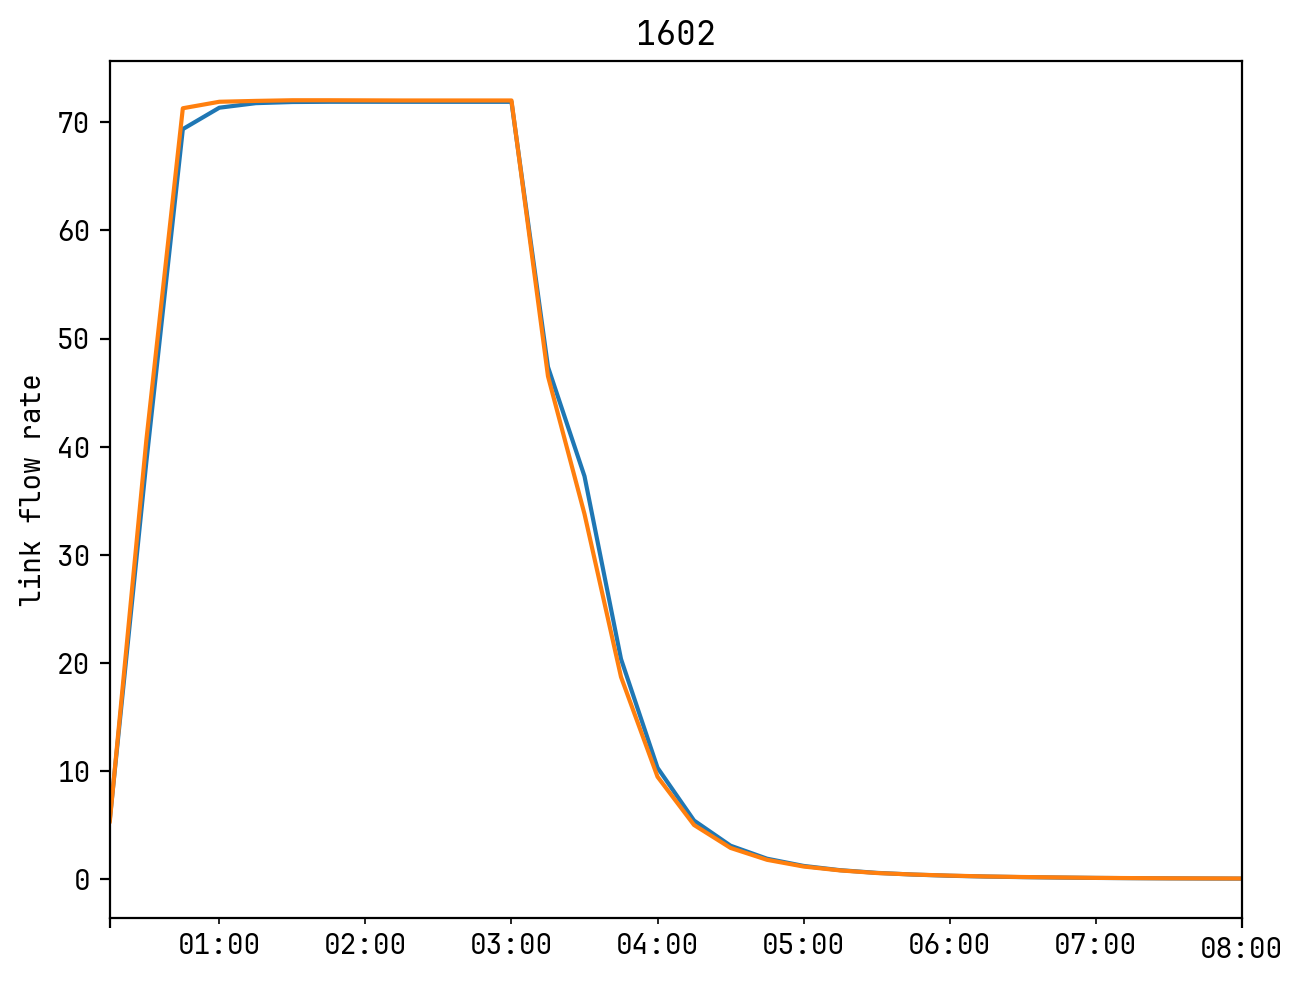

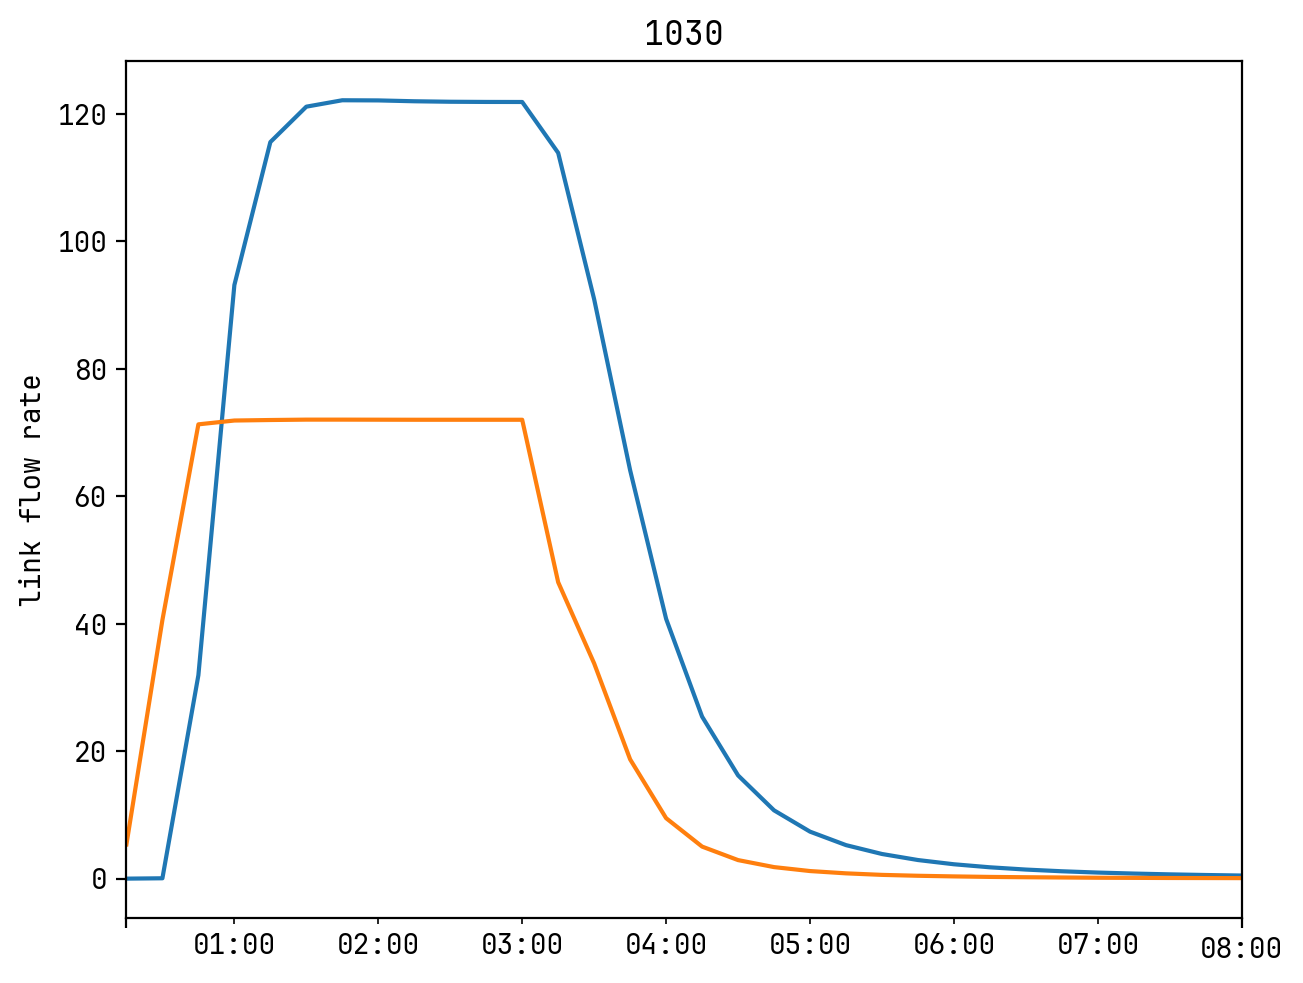

In [8]:
import matplotlib.pyplot as plt

for label in ('1602', '1030'):
    fig, ax = plt.subplots()
    out.get_part(OBJECTS.LINK, label, VARIABLES.LINK.FLOW).plot(ax=ax, label='simulated with SWMM5')
    df_extran['1602'].plot(ax=ax, label='simulated with SWMM3')
    ax.set_title(label)
    ax.set_ylabel('link flow rate')

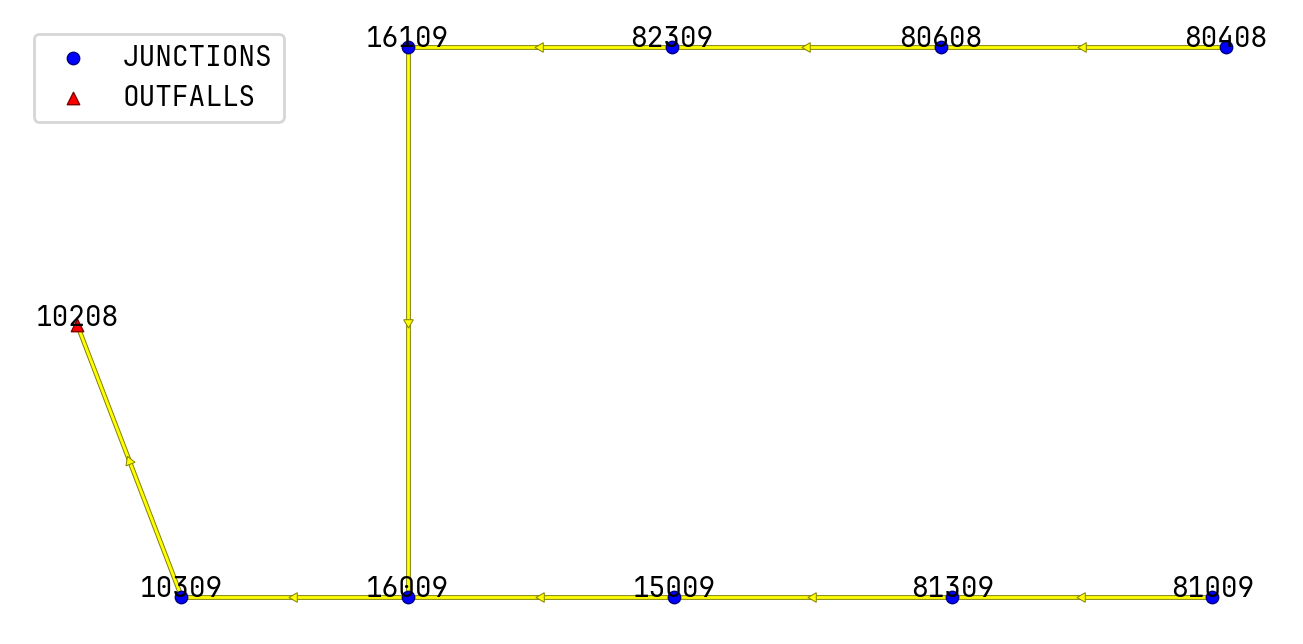

In [24]:
from swmm_api.input_file.macros.plotting_map import PlottingMap

PlottingMap(inp).add_link_map(add_arrows=True).add_node_map().add_node_labels()

## 4.
To relieve the flooding, add an orifice regulator between Nodes 82309 and 15009 with the following properties:

   - Type:          Bottom
   - Shape:         Circular
   - Height:        2 ft
   - Width:         2 ft
   - Crest Ht.      0 ft
   - Disch. Coeff.: 0.85

This re-creates the data for Example 3 of the Extran Manual.

Run the model and check the Status Report to see if this eliminates the flooding.

In [10]:
from swmm_api.input_file.sections import Orifice, CrossSection
inp_mod = inp.copy()

inp_mod.add_multiple(Orifice('Throttle', '82309', '15009', Orifice.ORIENTATION.BOTTOM, offset=0, discharge_coefficient=0.85),
                 CrossSection('Throttle', CrossSection.SHAPES.RECT_CLOSED, height=2, parameter_2=2))

with swmm5_run_temporary(inp_mod.copy(), run=swmm5_run_progress, label='example_run_swmm') as res:
    display(res.rpt.node_flooding_summary)
    display(res.rpt.conduit_surcharge_summary)

swmm5 /var/folders/3v/lct6k8mn02xdl7r3zg30bjl00000gn/T/tmpcn9udawc/example_run_swmm.inp:   0%|          | 0/10…

None

HoursFull_Both_Ends  Hours Full_Upstream  HoursFull_Dnstream  \
Conduit                                                                 
1602                    0.01                 2.13                0.01   

         Hours_Above Full_Normal Flow  Hours_Capacity_Limited  
Conduit                                                        
1602                             2.11                    0.01

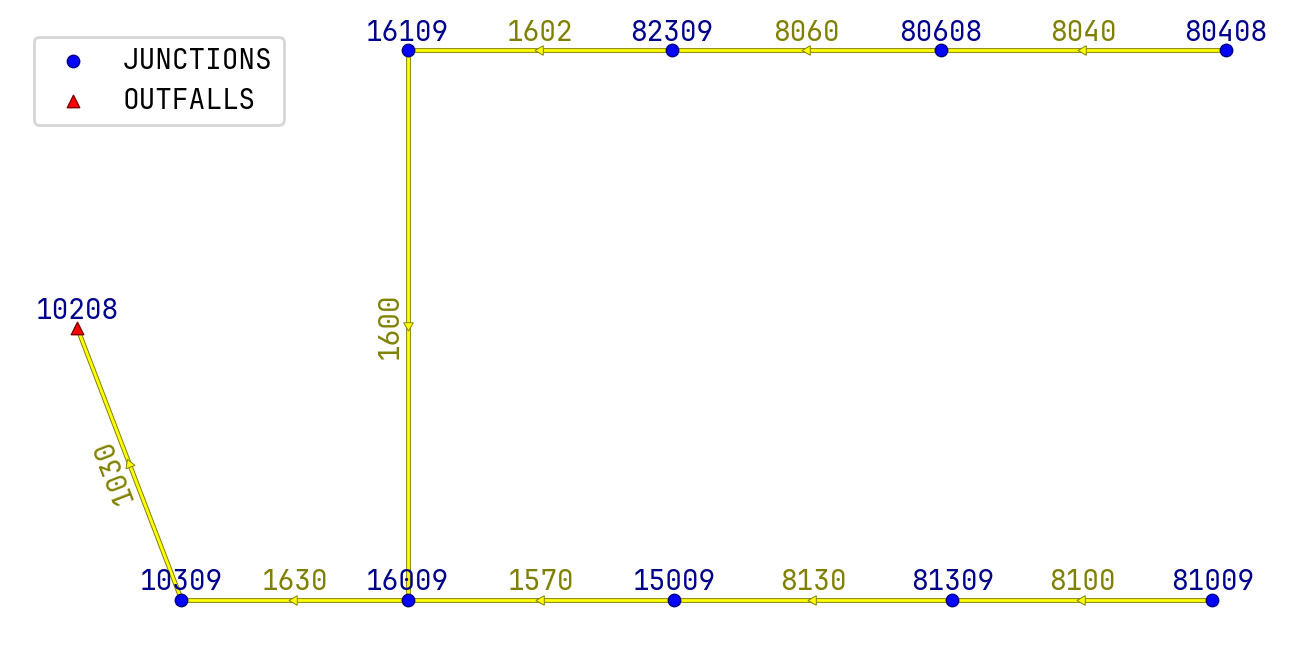

In [25]:
PlottingMap(inp).add_link_map(add_arrows=True).add_node_map().add_node_labels(y_offset=90, color='darkblue').add_link_labels(y_offset=90, color='olive')